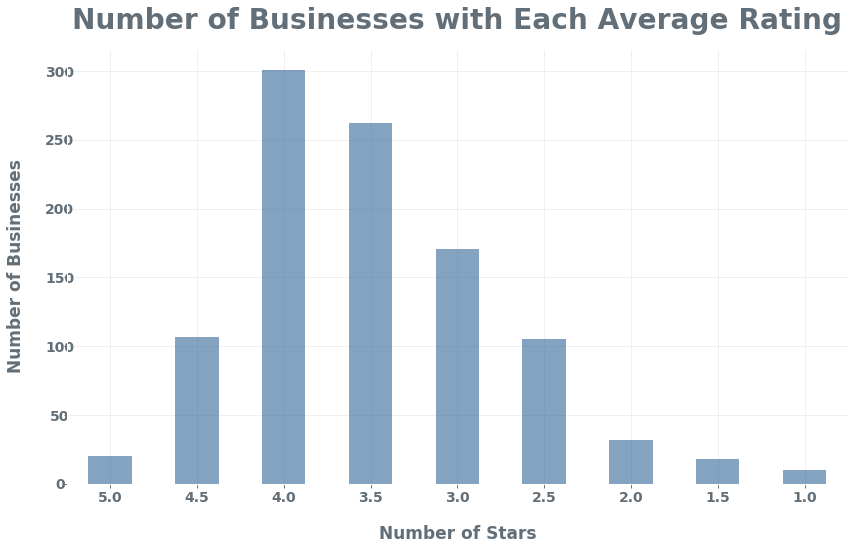

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np




reviews = pd.read_csv("reviews_madison.csv")
reviews["year"] = reviews["date"].str[:4]
business_madison = pd.read_csv("business_madison_with_groups.csv")



business_madison['stars'].value_counts().reindex([5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1]).plot(kind='bar',
                                    figsize=(14,8),
                                     color=(0.2, 0.4, 0.6, 0.6))


def format_plot(x_title, y_title, title):
    plt.style.use('ggplot')
    plt.rcParams['axes.facecolor']='white'
    plt.rc('grid', color='#ECECEC', linestyle='solid')
    plt.xticks(color='#626F78', rotation='0', fontweight='bold', fontsize='12')
    plt.yticks(color='#626F78', fontweight='bold', fontsize='14', horizontalalignment='center')
    plt.xlabel(x_title, labelpad = 20, fontweight='bold', color = '#626F78', fontsize='17', horizontalalignment='center')
    plt.ylabel(y_title, labelpad = 20, fontweight='bold', color = '#626F78', fontsize='17', horizontalalignment='center')
    plt.title(title, color = "#626F78", loc='center', horizontalalignment='center', fontsize = '28', y= 1.05, fontweight='bold',verticalalignment='center')
    plt.xticks(color='#626F78', rotation='0', fontweight='bold', fontsize='14')
    
format_plot(x_title = "Number of Stars", y_title = "Number of Businesses", title = "Number of Businesses with Each Average Rating")





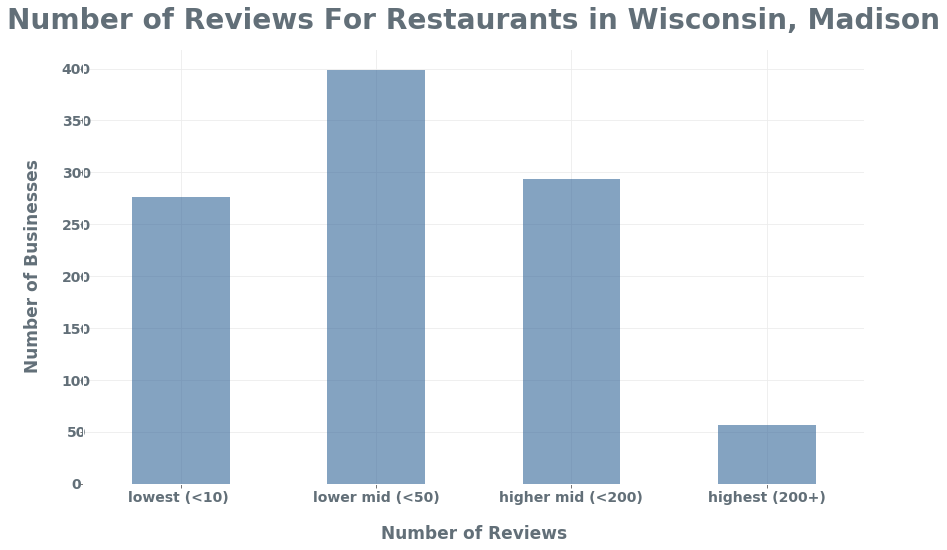

In [46]:
business_madison["review_groups"] = pd.cut(business_madison.review_count, (0,10,50,200,1500), labels = ("lowest (<10) ", "lower mid (<50)", "higher mid (<200)", "highest (200+)"))
business_madison.head()

business_madison['review_groups'].value_counts().reindex(["lowest (<10) ", "lower mid (<50)", "higher mid (<200)", "highest (200+)"]).plot(kind='bar',
                                    figsize=(14,8),
                                     color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(rotation='horizontal')
format_plot(x_title = "Number of Reviews", y_title = "Number of Businesses", title = "Number of Reviews For Restaurants in Wisconsin, Madison")


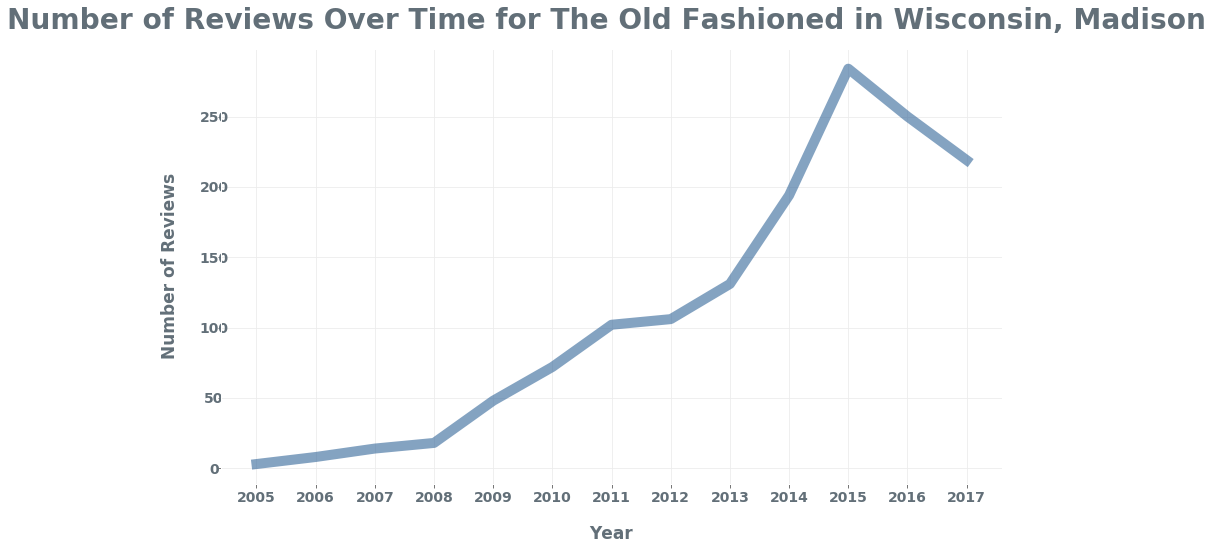

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
smol = reviews[reviews.business_id == 'RJNAeNA-209sctUO0dmwuA']
smol
s = smol.groupby('year').agg({'stars':'count'})
s.reset_index(inplace = True)
plt.plot(s.year,s.stars, color = (0.2, 0.4, 0.6, 0.6), lw=10)
format_plot(x_title = "Year", y_title = "Number of Reviews", title = "Number of Reviews Over Time for The Old Fashioned in Wisconsin, Madison ")



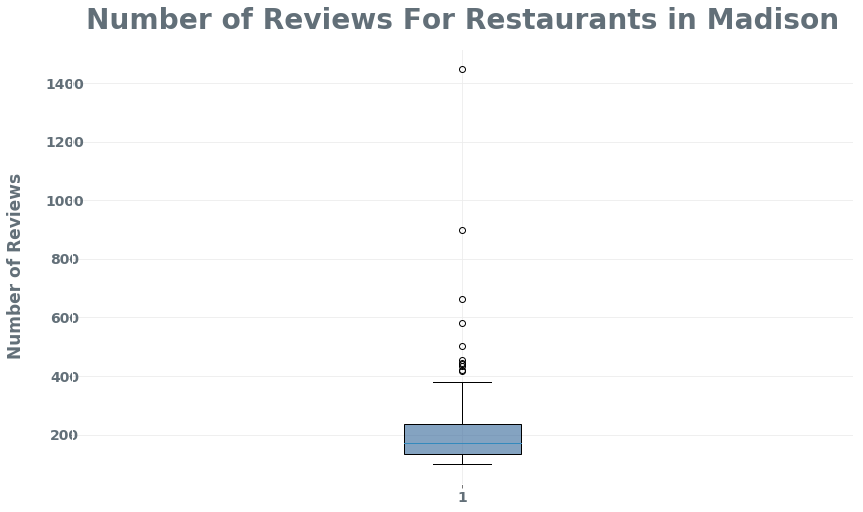

In [45]:
plt.style.use('ggplot')
format_plot(x_title = "", y_title = "Number of Reviews", title = "Number of Reviews For Restaurants in Madison")

box = plt.boxplot(business_madison.review_count[business_madison.review_count >= 100],  patch_artist=True)

colors =  (0.2, 0.4, 0.6, 0.6),
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()


Plotting a boxplot of the number of reviews for each restaurant, it is clear that there are some outliers with higher reviews than the rest. Specifically, there is one restaurant with over 1400 reviews. Digging into the data, it looks like this restaurant is called "The Old Fashioned", an american restaurant that is highly recommended and regarded and is featured on many Madison travel sites (known for its fried cheese curds). 

In order to better understand the restaurant's popularity, below is a plot of the number of reviews "The Old Fashioned" recieved over time. The restaurant has continuously increasing reviews from 2005 (partly due to its popularity, partly due to the popularity of yelp) until 2015, where its number of reviews begins to slowly decline. It is dificult to conclude whether this was due to yelp manipulating reviews (this was around the time that yelp came under contriversy for manipulating reviews in order to encourage restaurants to advertise on yelp), or whether another restaurant started competing with "The Old Fashioned"( perhaps they had better fried cheese curds).


The map below displays popular areas in Wisconsin Madison for restaurants. Red and yellow areas are more popular, whereas green and yellow areas are less popular. The area between Lake Mendota and Lake Monona clearly has the most restaurants in Madison. This makes sense, since water would provide for good views and a more enjoyable eating experience. However, the western outskirts south of Middleton and the eastern outskirts by the airport are also popular. 

In [ ]:
merged_by_year = merged.groupby(['cuisine_grp',  'year']).mean()
stars = merged_by_year["stars_y"].unstack()
avg_stars = stars[['2016', '2017']]
avg_stars["diff"] = stars['2017'] - stars['2016'] 
avg_stars.sort_values(by = "diff")

In [ ]:
merged_by_year = merged.groupby(['cuisine_grp',  'year']).sum()
stars = merged_by_year["stars_y"].unstack()
avg_stars = stars[['2016', '2017']]
avg_stars["diff"] = stars['2017'] - stars['2016'] 
avg_stars.sort_values(by = "diff")

In [ ]:
temp = pd.read_csv("temperature_and_severe_weather_events.csv")
new = reviews.merge(temp, how = 'left', left_on = "date", right_on = "DATE")
new = new.merge(business_madison, how = 'left', on = 'business_id')
new[['stars_y', 'temp_bin']].groupby(['temp_bin']).count().sort_values(by = "stars_y", ascending = False)



# new.pivot_table(values = "stars_y", index = "temp_bin", columns  = "cuisine_grp", margins = True, aggfunc = 'count')
